# Import the results

In [3]:
import utilitary
import easygui as eg
%matplotlib inline
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [5]:
path_files = eg.diropenbox('Where are the csv files?')

In [7]:
df, date = utilitary.import_results(output_path = path_files)

In [8]:
df

,Unnamed: 0,Well,Cell,Treatment,Slope,Intercept,R^2 score,Velocity,Time,Begin,End
0,0,A1,PNT1A,Control,74.774034,6.615215e+05,0.988329,0.066665,99.182045,0.0,0.6
1,3,A4,PC3,Control,869.888095,9.644765e+05,0.993413,0.775551,2.721031,0.0,0.6
2,4,A5,PC3,Control,869.888095,9.644765e+05,0.993413,0.775551,2.721031,0.0,0.6
3,5,A6,PC3,Methacycline 5 uM,521.305000,1.003566e+06,0.944380,0.464771,3.290782,0.0,0.6
4,9,B4,PC3,TGF-B 1 ng/mL,943.506667,1.010423e+06,0.995194,0.841186,1.697087,0.0,0.6
5,10,B5,PC3,TGF-B 1 ng/mL,909.006667,1.014558e+06,0.965514,0.810428,1.685684,0.0,0.6
6,11,B6,PC3,Methacycline 10 uM,227.081159,9.810126e+05,0.896845,0.202455,9.209882,0.0,0.6
7,14,C3,PNT1A,Methacycline 20 uM,73.247542,8.351627e+05,0.995131,0.065304,61.738890,0.0,0.6
8,15,C4,PC3,TGF-B 5 ng/mL,621.270000,9.587214e+05,0.918714,0.553895,3.964315,0.0,0.6
9,16,C5,PC3,TGF-B 5 ng/mL,916.296667,1.012567e+06,0.986836,0.816927,1.708482,0.0,0.6


## Define hue order

In [9]:
hueorder = sorted(list(df['Treatment'].unique())) #get names from the list
hueorder

['Control',
 'Methacycline 10 uM',
 'Methacycline 20 uM',
 'Methacycline 20 uM + TGF-B 10 ng/mL',
 'Methacycline 5 uM',
 'TGF-B 1 ng/mL',
 'TGF-B 10 ng/mL',
 'TGF-B 5 ng/mL']

## Select only positive values of velocity and r2 score higher than 0.75

In [12]:
df = df[(df['Velocity']>0)]
df = df[(df['R^2 score']>0.75)] 

## Plot

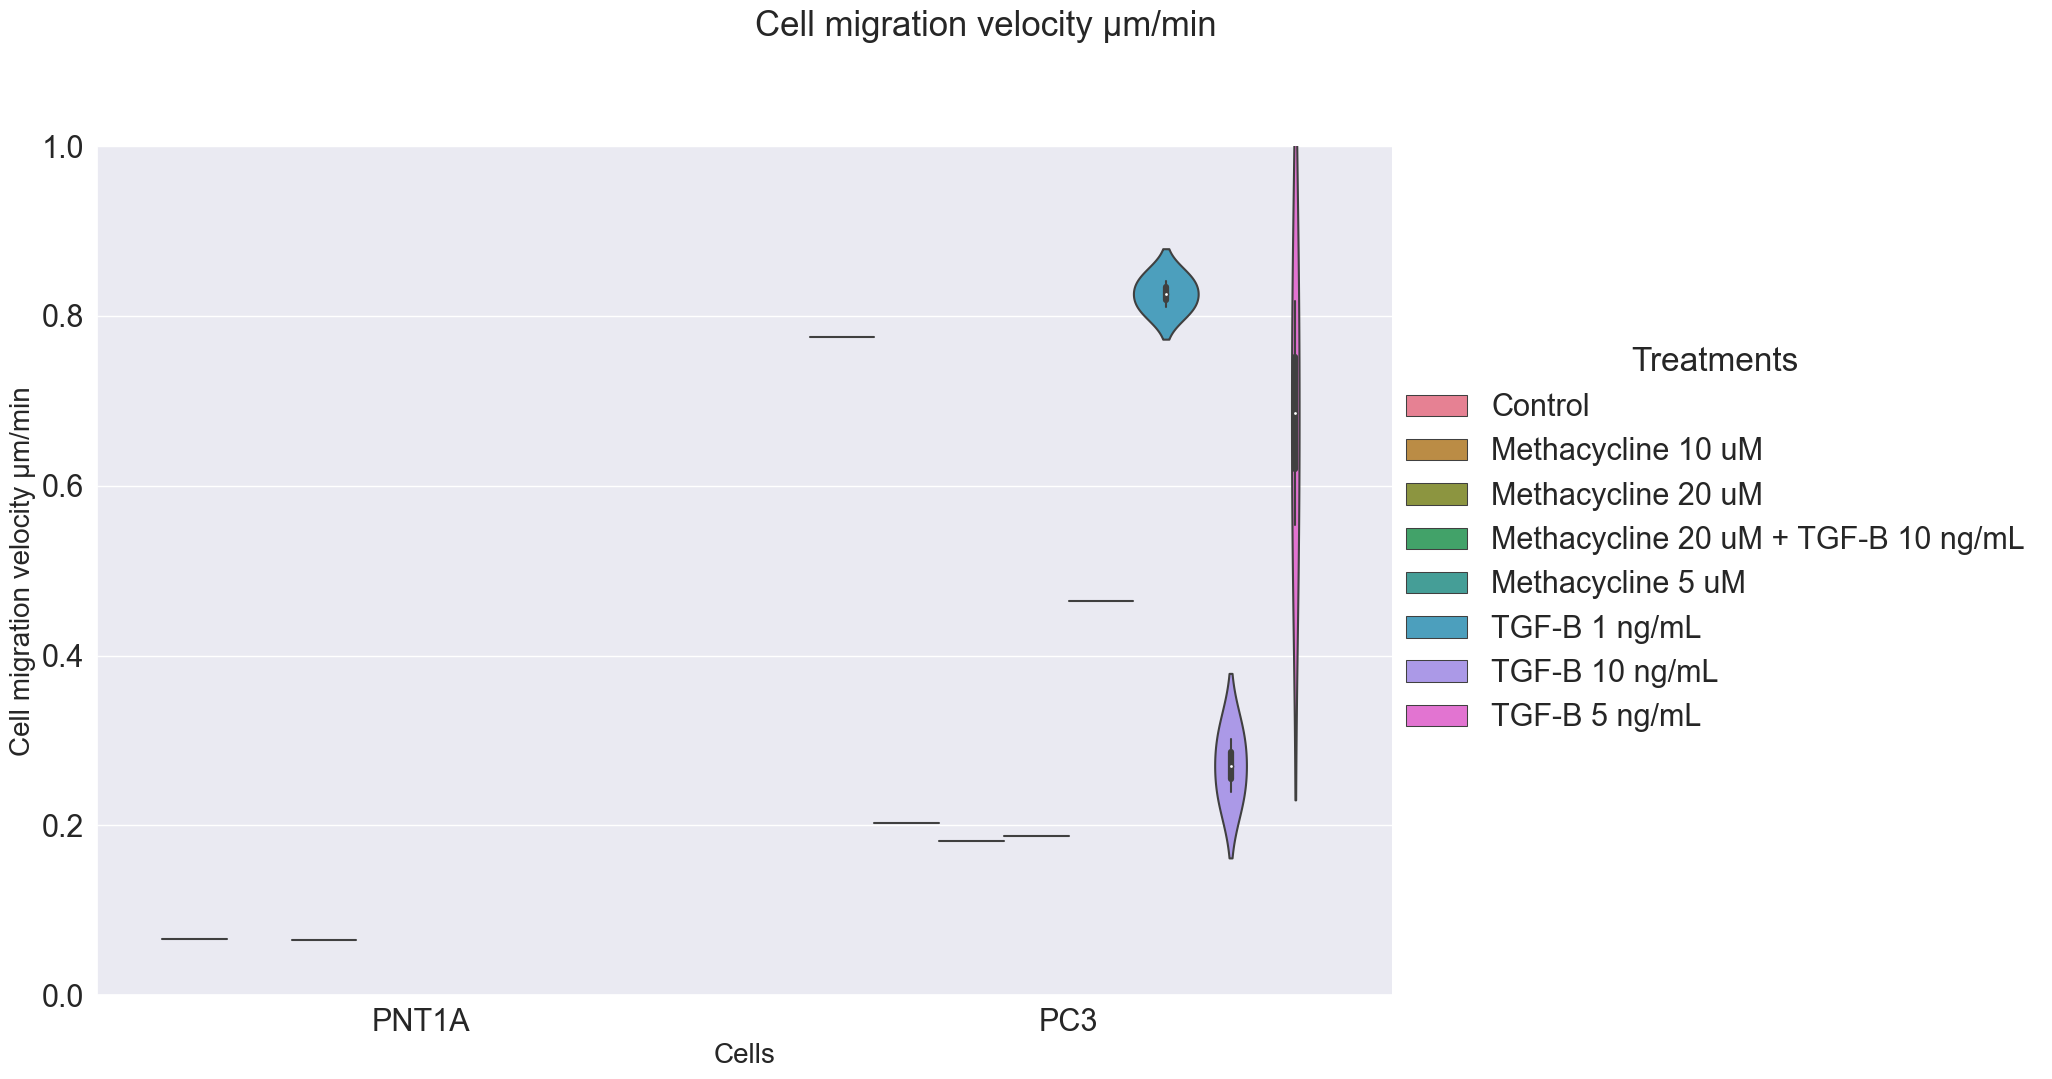

In [19]:
utilitary.plot_all(df, hueorder, date, xaxis = "Cell", yaxis = "Velocity", ylimit = (0,1), ylabel = "Cell migration velocity \u03bcm/min", output_path = path_files)

## Join data into one dataframe using the date of the assay

In [1]:
import pandas as pd

In [26]:
date1 = input()

 20181102


In [27]:
onerep = pd.read_csv(date1 + "/Results_" + date1 + ".csv", sep= ',')

In [28]:
date2 = input()

 20181116


In [29]:
tworep = pd.read_csv(date2 + "/Results_" + date2 + ".csv", sep= ',')

In [30]:
date3 = input()

 20181123


In [31]:
threerep = pd.read_csv(date3 + "/Results_" + date3 + ".csv", sep= ',')

In [244]:
date4 = input()

 20210423


In [245]:
fourrep = pd.read_csv(date4 + "/Results_" + date4 + ".csv", sep= ',')

In [246]:
date5 = input()

 20210428


In [247]:
fiverep = pd.read_csv(date5 + "/Results_" + date5 + ".csv", sep= ',')

In [32]:
df_total = pd.concat([onerep, 
                      tworep, 
                      threerep,
#                       fourrep,
#                       fiverep
                     ])

In [49]:
df_total = df_total[(df_total['Velocity']>0)]
df_total = df_total[(df_total['R^2score']>0.75)] 

In [34]:
df_total = df_total.reset_index()

In [43]:
df_total.to_csv(assay + '/Replicates.csv')

## Split dataframe to plot only one type of cell

In [21]:
def split_df(df, list_names):
    """Splits dataframe into the specified list_names given in the input
    Output is the dataframe splited"""
    df_trt = df['Cell']
    dflist = [] #saves the for output into this list
    for trt in range(len(df_trt)): #loop through the treatment names
        for name in list_names: #loop through the groups I want to split
            if name in df_trt[trt]: #if the str in the list is contained in the df)
                dflist.append(trt) #append indexes to a list
    df2 = df.copy() #create a copy from df
    df_split = df2.loc[dflist]
    
    return df_split

In [20]:
pc3 = ['PC3'] #define which cell

In [20]:
df_total = df_total.reset_index()

In [22]:
df_pc3 = split_df(df_total, pc3)

## Define hue order

In [35]:
hueorder = sorted(list(df_total['Treatment'].unique()))

In [36]:
hueorder

['Control', 'DOTAP', 'Pluronic F68', 'SLN', 'Stearic Acid', 'TGF-B']

In [293]:
hueorder = ['Control',
 'SLN',
 'SLN + TGF-B 10 ng/mL',
 'TGF-B 1 ng/mL',
 'TGF-B 5 ng/mL',
 'TGF-B 10 ng/mL']

## Provide assay folder name

In [83]:
assay = input()

 SLNComponents


## Plot

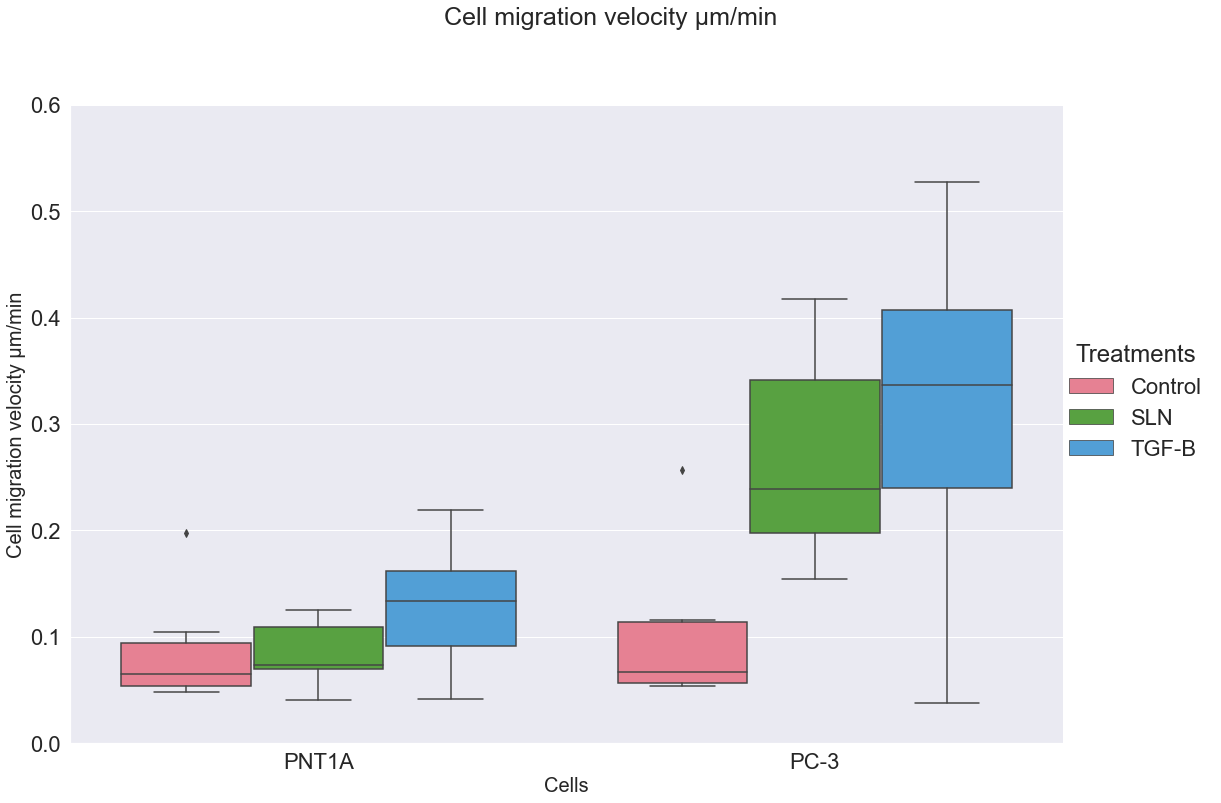

In [84]:
utilitary.plot_all_replicates(df_total, hueorder, xaxis = "Cell", yaxis = "Velocity", ylimit = (0,0.6), ylabel = "Cell migration velocity \u03bcm/min", assay = assay)

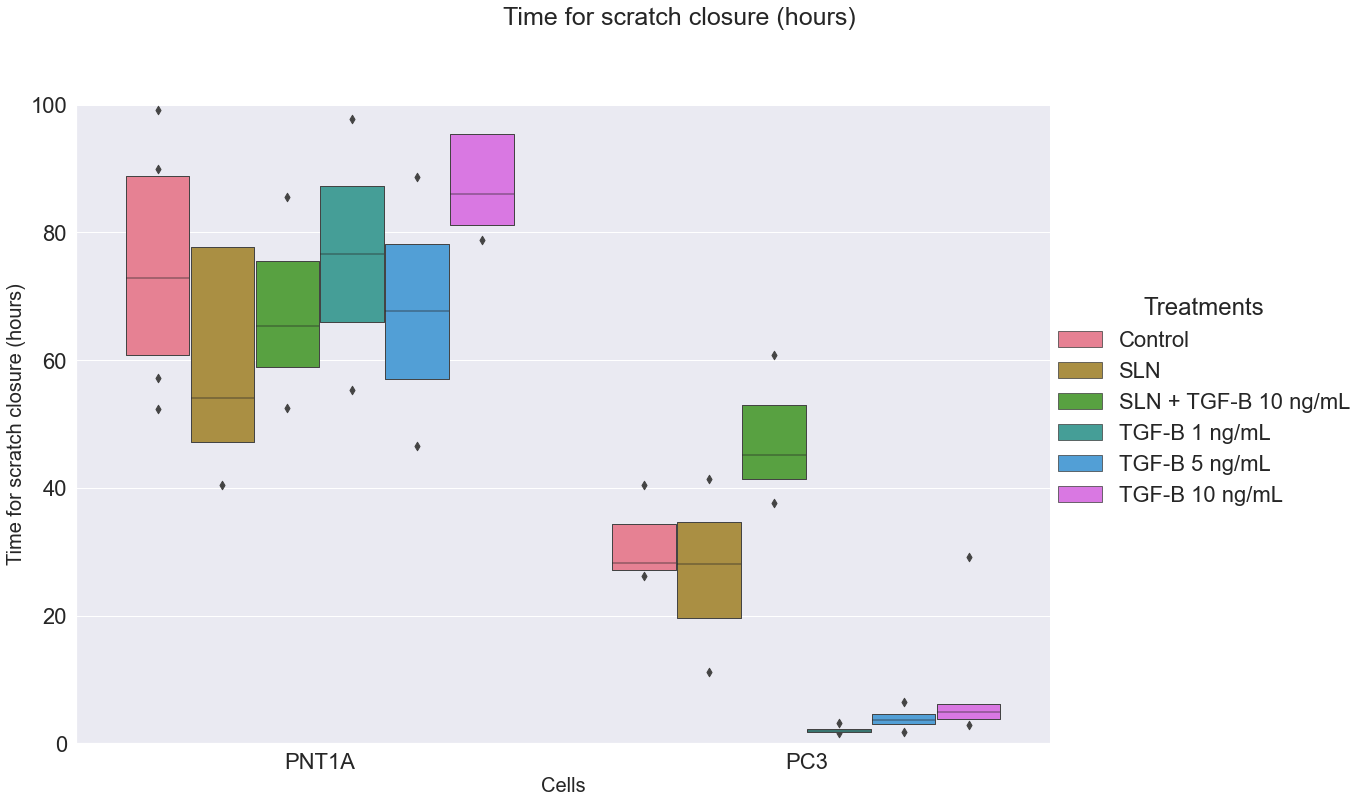

In [297]:
utilitary.plot_all_replicates(df_total, hueorder, xaxis = "Cell", yaxis = "Time", ylimit = (0,100), ylabel = "Time for scratch closure (hours)", assay = assay)